# Métricas de desempeño

## Importar los módulos necesarios

In [1]:
pip install paretoset

In [2]:
import random
import math
import io
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from paretoset import paretoset
from tqdm.notebook import trange, tqdm

%matplotlib inline

import matplotlib.pyplot as plt

## Notebook de los algoritmos

In [5]:
%run VRPTW-SPEA.ipynb
%run VRPTW-M3AS.ipynb

## Ejecución de los algoritmos

### SPEA

Generaciones:   0%|          | 0/100 [00:00<?, ?gen/s]

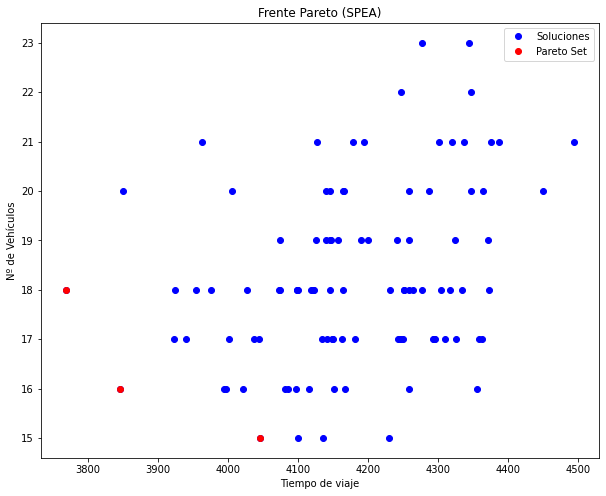

In [7]:
archivo = preprocesamiento("datos/original/vrptw_c101")

pob = []
par = []

pob, par = spea(pob, par, archivo, m=100, c_pbb=0.8, m_pbb=0.3, generaciones=100)

graficar_spea(pob, par, save="ParetoSetSPEA.jpg")

### M3AS

Generaciones:   0%|          | 0/10 [00:00<?, ?gen/s]

Hormigas:   0%|          | 0/100 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/100 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/100 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/100 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/100 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/100 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/100 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/100 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/100 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/100 [00:00<?, ?hormiga/s]

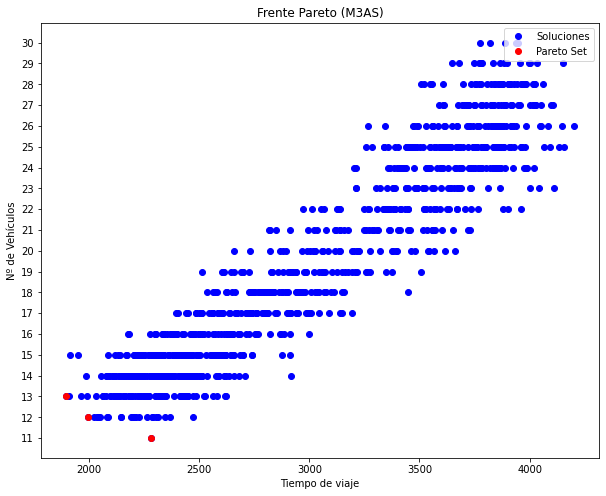

In [8]:
instancia = procesar_instancia("datos/original/vrptw_c101.txt")

np.random.seed(777) # Para reproducibilidad
p_set, p_gen = m3as(instancia, m=100, p=0.7, beta=0.7, generaciones=10)

graficar_m3as(p_set, p_gen, save="ParetoSetM3AS.jpg")

## Métricas

In [9]:
def valor_promedio(pareto_sets, metrica):
    valor = 0
    for p in pareto_sets:
        valor += metrica(p)
    return valor/len(pareto_sets)

def dist(p, q, std):
    dy = (p['cantidad_vehiculo'] - q['cantidad_vehiculo']) / std['num_vehiculos']
    dx = (p['costo_total'] - q['costo_total']) / std['tiempo_total']
    return np.linalg.norm([dx, dy])

def m1(pareto_set, ytrue):    
    suma = 0
    for p in pareto_set:
        d = []
        for q in ytrue:
            d.append(dist(p, q, std))
        suma += min(d)
    return suma/len(pareto_set)

def m2(pareto_set, sigma):
    cont = 0
    for p in pareto_set:
        for q in pareto_set:
            if dist(p, q, std) > sigma:
                cont += 1
    return cont/(len(pareto_set)+1)

def m3(pareto_set):
    d = []
    for p in pareto_set:
        for q in pareto_set:
            d.append(dist(p, q, std))
    return max(d)

def error(pareto_set, ytrue):
    e = 0
    for i in pareto_set:
        if i in ytrue:
            e += 1
    return e/len(pareto_set)

def graficar_ytrue(ytrue, m3as, spea, save=False):
    fig, ax = plt.subplots(figsize=(10, 8))
    
    ax.plot([s['costo_total'] for s in m3as],
            [s['cantidad_vehiculo'] for s in m3as],
            'go',
            label="Soluciones M3AS")

    ax.plot([s['costo_total'] for s in spea],
            [s['cantidad_vehiculo'] for s in spea],
            'bo',
            label="Soluciones SPEA")

    ax.plot([s['costo_total'] for s in ytrue],
            [s['cantidad_vehiculo'] for s in ytrue],
            'ro',
            label="Frente Ytrue")

    ax.set(xlabel="Tiempo de viaje",
           ylabel="Nº de Vehículos",
           title="Frente Pareto")
    ax.yaxis.set_major_locator(ticker.MultipleLocator())
    ax.legend(loc='upper right')
    
    if save:
        os.makedirs("figs", exist_ok=True)
        plt.savefig(f"figs/{save}")

## Ejecuciones de pruebas

Instancia RC101

In [10]:
def sol2dict(a):
    aux = []
    for s in a:
        aux.append({"costo_total": s.tiempo_total, "cantidad_vehiculo": s.num_vehiculos, "ruta": s.caminos})
    return aux

def paretoValue(p):
    aux = []
    for s in p:
        for i in s:
            aux.append(i)
    return aux

def yTrue(pareto_m3as, pareto_spea):
    solucion = []
    solucion = solucionesNoDominadas(paretoValue(pareto_m3as) + paretoValue(pareto_spea))
    return solucion

In [11]:
pareto_m3as = []
pareto_spea = []
soluciones_m3as = []
soluciones_spea = []

archivo = preprocesamiento("datos/original/vrptw_rc101")
instancia = procesar_instancia("datos/original/vrptw_rc101.txt")
np.random.seed(777) # Para reproducibilidad

for i in range(5):
    p_set, p_gen = m3as(instancia, m=5, p=0.7, beta=0.7, generaciones=5)
    pob, par = spea(pob, par, archivo, m=5, c_pbb=0.8, m_pbb=0.3, generaciones=5)
    
    p_set = sol2dict(p_set)
    pareto_m3as.append(p_set)
    pareto_spea.append(par)
    soluciones_m3as.extend(p_gen)
    soluciones_spea.extend(pob)

soluciones_m3as = sol2dict(soluciones_m3as)
ytrue = yTrue(pareto_m3as, pareto_spea)

Generaciones:   0%|          | 0/5 [00:00<?, ?gen/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Generaciones:   0%|          | 0/5 [00:00<?, ?gen/s]

Generaciones:   0%|          | 0/5 [00:00<?, ?gen/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Generaciones:   0%|          | 0/5 [00:00<?, ?gen/s]

Generaciones:   0%|          | 0/5 [00:00<?, ?gen/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Generaciones:   0%|          | 0/5 [00:00<?, ?gen/s]

Generaciones:   0%|          | 0/5 [00:00<?, ?gen/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Generaciones:   0%|          | 0/5 [00:00<?, ?gen/s]

Generaciones:   0%|          | 0/5 [00:00<?, ?gen/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Generaciones:   0%|          | 0/5 [00:00<?, ?gen/s]

A continuación se muestran las métricas comparativas promedio de los dos algoritmos, a lo largo de las cinco pruebas:

Métricas promedio del algoritmo M3AS
M1:  0.1537241631571661
M2:  0.26666666666666666
M3:  0.3135756368899395
Error:  0.3

Métricas promedio del algoritmo SPEA
M1:  0.36144240816006173
M2:  0.26666666666666666
M3:  0.1730203703865762
Error:  0.4


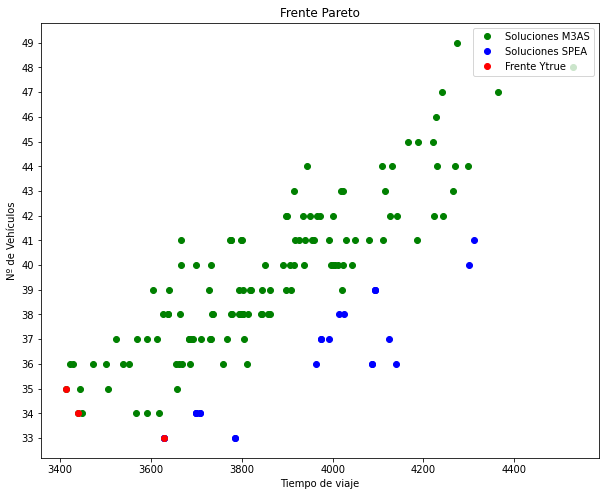

In [12]:
std = {'num_vehiculos': np.std([s['cantidad_vehiculo'] for s in soluciones_m3as + soluciones_spea]),
       'tiempo_total': np.std([s['costo_total'] for s in soluciones_m3as + soluciones_spea])}

print("Métricas promedio del algoritmo M3AS")
print("M1: ", valor_promedio(pareto_m3as, lambda p: m1(p, ytrue)))
print("M2: ", valor_promedio(pareto_m3as, lambda p: m2(p, 0.25)))
print("M3: ", valor_promedio(pareto_m3as, lambda p: m3(p)))
print("Error: ", valor_promedio(pareto_m3as, lambda p: error(p, ytrue)))
print()
print("Métricas promedio del algoritmo SPEA")
print("M1: ", valor_promedio(pareto_spea, lambda p: m1(p, ytrue)))
print("M2: ", valor_promedio(pareto_spea, lambda p: m2(p, 0.25)))
print("M3: ", valor_promedio(pareto_spea, lambda p: m3(p)))
print("Error: ", valor_promedio(pareto_spea, lambda p: error(p, ytrue)))

graficar_ytrue(ytrue, soluciones_m3as, soluciones_spea, save="ParetoSetYtrue_RC101.jpg")

Instancia C101

In [15]:
pareto_m3as = []
pareto_spea = []
soluciones_m3as = []
soluciones_spea = []

archivo = preprocesamiento("datos/original/vrptw_c101")
instancia = procesar_instancia("datos/original/vrptw_c101.txt")
np.random.seed(777) # Para reproducibilidad

for i in range(5):
    p_set, p_gen = m3as(instancia, m=5, p=0.7, beta=0.7, generaciones=5)
    pob, par = spea(pob, par, archivo, m=5, c_pbb=0.8, m_pbb=0.3, generaciones=5)
    
    p_set = sol2dict(p_set)
    pareto_m3as.append(p_set)
    pareto_spea.append(par)
    soluciones_m3as.extend(p_gen)
    soluciones_spea.extend(pob)

soluciones_m3as = sol2dict(soluciones_m3as)
ytrue = yTrue(pareto_m3as, pareto_spea)

Generaciones:   0%|          | 0/5 [00:00<?, ?gen/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Generaciones:   0%|          | 0/5 [00:00<?, ?gen/s]

Generaciones:   0%|          | 0/5 [00:00<?, ?gen/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Generaciones:   0%|          | 0/5 [00:00<?, ?gen/s]

Generaciones:   0%|          | 0/5 [00:00<?, ?gen/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Generaciones:   0%|          | 0/5 [00:00<?, ?gen/s]

Generaciones:   0%|          | 0/5 [00:00<?, ?gen/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Generaciones:   0%|          | 0/5 [00:00<?, ?gen/s]

Generaciones:   0%|          | 0/5 [00:00<?, ?gen/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Hormigas:   0%|          | 0/5 [00:00<?, ?hormiga/s]

Generaciones:   0%|          | 0/5 [00:00<?, ?gen/s]

A continuación se muestran las métricas comparativas promedio de los dos algoritmos, a lo largo de las cinco pruebas:

Métricas promedio del algoritmo M3AS
M1:  0.44665863240351317
M2:  0.3
M3:  0.3350324558249041
Error:  0.6

Métricas promedio del algoritmo SPEA
M1:  0.5719817743741651
M2:  1.1666666666666665
M3:  0.8890592653757583
Error:  0.13333333333333333


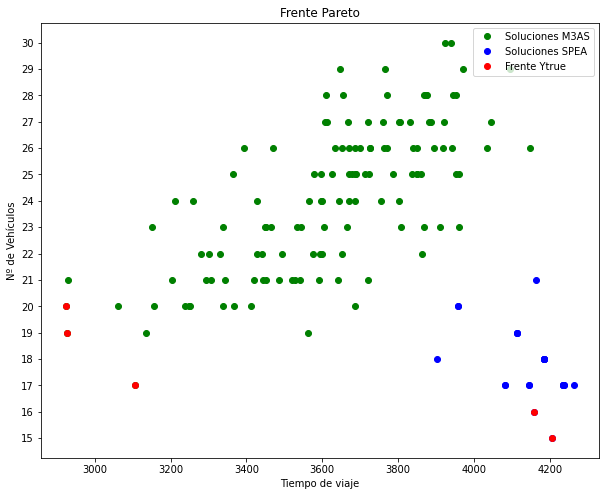

In [16]:
std = {'num_vehiculos': np.std([s['cantidad_vehiculo'] for s in soluciones_m3as + soluciones_spea]),
       'tiempo_total': np.std([s['costo_total'] for s in soluciones_m3as + soluciones_spea])}

print("Métricas promedio del algoritmo M3AS")
print("M1: ", valor_promedio(pareto_m3as, lambda p: m1(p, ytrue)))
print("M2: ", valor_promedio(pareto_m3as, lambda p: m2(p, 0.25)))
print("M3: ", valor_promedio(pareto_m3as, lambda p: m3(p)))
print("Error: ", valor_promedio(pareto_m3as, lambda p: error(p, ytrue)))
print()
print("Métricas promedio del algoritmo SPEA")
print("M1: ", valor_promedio(pareto_spea, lambda p: m1(p, ytrue)))
print("M2: ", valor_promedio(pareto_spea, lambda p: m2(p, 0.25)))
print("M3: ", valor_promedio(pareto_spea, lambda p: m3(p)))
print("Error: ", valor_promedio(pareto_spea, lambda p: error(p, ytrue)))

graficar_ytrue(ytrue, soluciones_m3as, soluciones_spea, save="ParetoSetYtrue_C101.jpg")